<a href="https://colab.research.google.com/github/nssanch/teaching_datasci/blob/main/Sanchez_AFS_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Natalie Sanchez

AFS Unit 3 -- Final Project

Background info on the data:

Samples are rhizosphere collected from different sections of the roots.
4 different plant genotypes and 4 differnt root sections

illumina sequencing on the V4 region of the 16S gene was used to identify the bacteria present in the samples.

Data is count data -- # counts of each bacteria present in each sample


In [3]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.decomposition import PCA

%matplotlib inline

In [4]:
data = pd.read_csv("drive/MyDrive/PastCollegeStuffs/taxa_counts_level-7.csv")
print(data.shape)
data.head()


(93, 570)


,index,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Pantoea;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Burkholderiaceae;g__Burkholderia-Caballeronia-Paraburkholderia;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae;g__Serratia;__,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;__;__,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia;o__Chloroplast;f__Chloroplast;g__Chloroplast;__,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rickettsiales;f__Mitochondria;g__Mitochondria;s__Arachis_hypogaea,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Azospirillales;f__Inquilinaceae;g__Inquilinus;__,...,d__Bacteria;p__SAR324_clade(Marine_group_B);c__SAR324_clade(Marine_group_B);o__SAR324_clade(Marine_group_B);f__SAR324_clade(Marine_group_B);g__SAR324_clade(Marine_group_B);s__metagenome,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Micromonosporales;f__Micromonosporaceae;g__Actinocatenispora;__,d__Bacteria;p__Fibrobacterota;c__Fibrobacteria;o__Fibrobacterales;f__Fibrobacteraceae;g__possible_genus_04;s__metagenome,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Cytophagales;f__Amoebophilaceae;g__Candidatus_Amoebophilus;s__endosymbiont_of,d__Bacteria;p__Myxococcota;c__bacteriap25;o__bacteriap25;f__bacteriap25;g__bacteriap25;s__uncultured_soil,barcode-sequence,Genotype,Plot,Plant,Section
0,DV001-123,2694.0,7054.0,5565.0,2735.0,0.0,2432.0,89.0,23.0,24.0,...,0.0,0.0,0.0,0.0,0.0,CTCGACTT+CTACTATA,Desi,L9,2,Nodule
1,DV001-124,1913.0,6140.0,5051.0,1016.0,0.0,126.0,147.0,35.0,108.0,...,0.0,0.0,0.0,0.0,0.0,CGAAGTAT+CTACTATA,Billy Beans,30,1,Top
2,DV001-125,89.0,216.0,312.0,5616.0,0.0,246.0,386.0,198.0,438.0,...,0.0,0.0,0.0,0.0,0.0,TAGCAGCT+CTACTATA,Nash,69,2,Bottom
3,DV001-126,597.0,4533.0,6257.0,3846.0,0.0,1874.0,155.0,41.0,18.0,...,0.0,0.0,0.0,0.0,0.0,TCTCTATG+CTACTATA,Desi,L33,1,Nodule
4,DV001-127,6040.0,919.0,7104.0,557.0,0.0,568.0,36.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,GATCTACG+CTACTATA,Nash,2,1,Nodule


In [5]:
samples = data['index']
samples.head()
#The list of samples in this data

0    DV001-123
1    DV001-124
2    DV001-125
3    DV001-126
4    DV001-127
Name: index, dtype: object

In [6]:
header = pd.read_csv("drive/MyDrive/PastCollegeStuffs/taxa_counts_level-7.csv", header = None )
bacts = header.iloc[0, 1:565]
bacts
#The list of bacteria in this data

1      d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
2      d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
3      d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
4      d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
5      d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
                             ...                        
560    d__Bacteria;p__SAR324_clade(Marine_group_B);c_...
561    d__Bacteria;p__Actinobacteriota;c__Actinobacte...
562    d__Bacteria;p__Fibrobacterota;c__Fibrobacteria...
563    d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...
564    d__Bacteria;p__Myxococcota;c__bacteriap25;o__b...
Name: 0, Length: 564, dtype: object

In [7]:
some_data = data.iloc[:,1:565]
some_data
#subsampling the data to remove the sample names and metadata 

,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Pantoea;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Burkholderiaceae;g__Burkholderia-Caballeronia-Paraburkholderia;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae;g__Serratia;__,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;__;__,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia;o__Chloroplast;f__Chloroplast;g__Chloroplast;__,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rickettsiales;f__Mitochondria;g__Mitochondria;s__Arachis_hypogaea,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Azospirillales;f__Inquilinaceae;g__Inquilinus;__,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Sphingobacteriales;f__Sphingobacteriaceae;g__Mucilaginibacter;__,...,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Burkholderiaceae;__;__,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Caulobacterales;f__Caulobacteraceae;g__Brevundimonas;__,d__Bacteria;p__Acidobacteriota;c__Acidobacteriae;o__Acidobacteriales;f__Koribacteraceae;g__Candidatus_Koribacter;s__uncultured_Acidobacteria,d__Bacteria;p__Acidobacteriota;c__Vicinamibacteria;o__Vicinamibacterales;f__uncultured;g__uncultured;s__uncultured_soil,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__211ds20;f__211ds20;g__211ds20;s__metagenome,d__Bacteria;p__SAR324_clade(Marine_group_B);c__SAR324_clade(Marine_group_B);o__SAR324_clade(Marine_group_B);f__SAR324_clade(Marine_group_B);g__SAR324_clade(Marine_group_B);s__metagenome,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Micromonosporales;f__Micromonosporaceae;g__Actinocatenispora;__,d__Bacteria;p__Fibrobacterota;c__Fibrobacteria;o__Fibrobacterales;f__Fibrobacteraceae;g__possible_genus_04;s__metagenome,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Cytophagales;f__Amoebophilaceae;g__Candidatus_Amoebophilus;s__endosymbiont_of,d__Bacteria;p__Myxococcota;c__bacteriap25;o__bacteriap25;f__bacteriap25;g__bacteriap25;s__uncultured_soil
0,2694.0,7054.0,5565.0,2735.0,0.0,2432.0,89.0,23.0,24.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1913.0,6140.0,5051.0,1016.0,0.0,126.0,147.0,35.0,108.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,89.0,216.0,312.0,5616.0,0.0,246.0,386.0,198.0,438.0,868.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,597.0,4533.0,6257.0,3846.0,0.0,1874.0,155.0,41.0,18.0,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6040.0,919.0,7104.0,557.0,0.0,568.0,36.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,180.0,235.0,1119.0,377.0,16542.0,238.0,42.0,0.0,103.0,62.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,14806.0,56.0,3714.0,453.0,0.0,957.0,6.0,0.0,53.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,3126.0,3827.0,3084.0,3126.0,60.0,218.0,866.0,352.0,384.0,405.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,354.0,5985.0,5379.0,123.0,5745.0,438.0,0.0,0.0,16.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
da = xr.DataArray(data = some_data, coords = [samples, bacts], dims = ['sample', 'bacteria'])
da
#make a data array

<xarray.DataArray (sample: 93, bacteria: 564)>
array([[2694., 7054., 5565., ...,    0.,    0.,    0.],
       [1913., 6140., 5051., ...,    0.,    0.,    0.],
       [  89.,  216.,  312., ...,    0.,    0.,    0.],
       ...,
       [3126., 3827., 3084., ...,    0.,    0.,    0.],
       [ 354., 5985., 5379., ...,    0.,    0.,    0.],
       [ 674., 9366., 7947., ...,    0.,    0.,    0.]])
Coordinates:
  * sample    (sample) object 'DV001-123' 'DV001-124' ... 'DV001-217'
  * bacteria  (bacteria) object 'd__Bacteria;p__Proteobacteria;c__Gammaproteo...

In [9]:
metadata = data.iloc[:,566:570]
genotype = data.iloc[:,566]
plot = data.iloc[:,567]
section = data.iloc[:,569]

dag = xr.DataArray(data = genotype, coords = [samples], dims = ['sample'])
dap = xr.DataArray(data = plot, coords = [samples], dims = ['sample'])
das = xr.DataArray(data = section, coords = [samples], dims = ['sample'])

#do all this to get separate data arrays for all the variables so I can combine them into one big dataset later

In [10]:
ds = da.to_dataset(name = 'counts')
ds
#make the data array a dataset

<xarray.Dataset>
Dimensions:   (bacteria: 564, sample: 93)
Coordinates:
  * sample    (sample) object 'DV001-123' 'DV001-124' ... 'DV001-217'
  * bacteria  (bacteria) object 'd__Bacteria;p__Proteobacteria;c__Gammaproteo...
Data variables:
    counts    (sample, bacteria) float64 2.694e+03 7.054e+03 ... 0.0 0.0

In [11]:
ds1 = ds.assign(Genotype = dag, Plot = dap, Section = das)
ds1
#now I have all the data Variables in the dataset

<xarray.Dataset>
Dimensions:   (bacteria: 564, sample: 93)
Coordinates:
  * sample    (sample) object 'DV001-123' 'DV001-124' ... 'DV001-217'
  * bacteria  (bacteria) object 'd__Bacteria;p__Proteobacteria;c__Gammaproteo...
Data variables:
    counts    (sample, bacteria) float64 2.694e+03 7.054e+03 ... 0.0 0.0
    Genotype  (sample) object 'Desi' 'Billy Beans' ... 'Billy Beans' 'Nash'
    Plot      (sample) object 'L9' '30' '69' 'L33' '2' ... '28' '28' '62' '69'
    Section   (sample) object 'Nodule' 'Top' 'Bottom' ... 'Nodule' 'Nodule'

In [ ]:
mean_log_counts = np.mean(np.log(ds1['counts'].values+1), axis = 0)
mean_log_counts

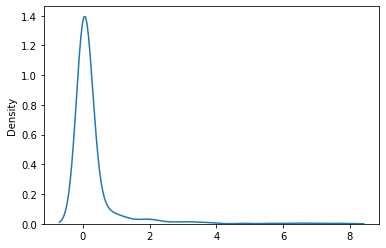

In [13]:
sns.kdeplot(mean_log_counts)

In [14]:
log_cnts = np.log(ds1['counts'].values+1)

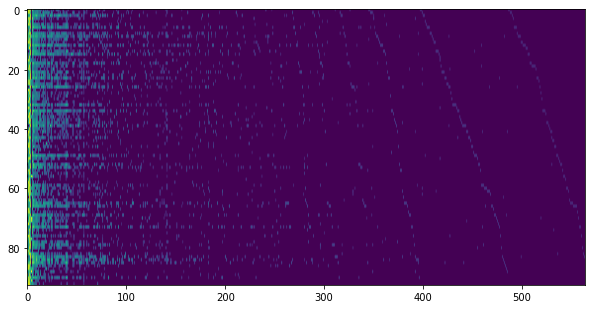

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(log_cnts, aspect = 3)

In [16]:
pca_mod = PCA()
log_cnts_pca = pca_mod.fit_transform(log_cnts)
log_cnts_pca.shape

(93, 93)

In [17]:
labels = ds1[['Section', 'Plot', 'Genotype']].to_dataframe()
print(labels.shape)
labels.head()

(93, 3)


,Section,Plot,Genotype
sample,,,
DV001-123,Nodule,L9,Desi
DV001-124,Top,30,Billy Beans
DV001-125,Bottom,69,Nash
DV001-126,Nodule,L33,Desi
DV001-127,Nodule,2,Nash


In [18]:
labels['pca1'] = log_cnts_pca[:,0]
labels['pca2'] = log_cnts_pca[:,1]
print(labels.shape)
labels.head()

(93, 5)


,Section,Plot,Genotype,pca1,pca2
sample,,,,,
DV001-123,Nodule,L9,Desi,-3.071932,0.831440
DV001-124,Top,30,Billy Beans,1.680808,-5.644916
DV001-125,Bottom,69,Nash,14.711673,11.499749
DV001-126,Nodule,L33,Desi,-2.659536,-1.326584
DV001-127,Nodule,2,Nash,-11.202829,-0.454636


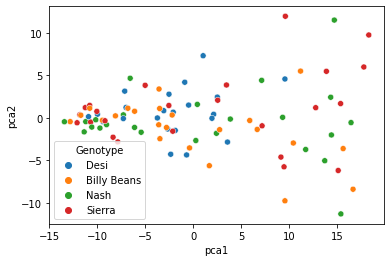

In [19]:
sns.scatterplot(data = labels, x = 'pca1', y = 'pca2', hue = 'Genotype')

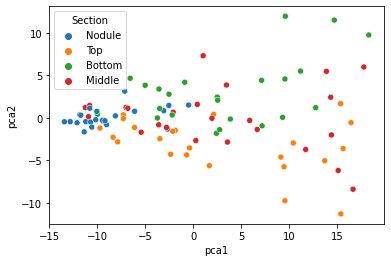

In [20]:
sns.scatterplot(data = labels, x = 'pca1', y = 'pca2', hue = 'Section')

In [22]:
pip install umap-learn


     |████████████████████████████████| 88 kB 6.3 MB/s 
     |████████████████████████████████| 1.1 MB 52.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=a05702132f9d96e1f8a22ff424d3abfa8666aba8bd5ece98bafc049d6672874b
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=8a4e71e4124f9c0e67f9682f7fb83b5d42a355df886d6dab892d5f1d97c91371
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [23]:
import umap

In [24]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(log_cnts)
embedding.shape

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(93, 2)

Text(0.5, 1.0, 'UMAP projection of Rhizosphere by Section')

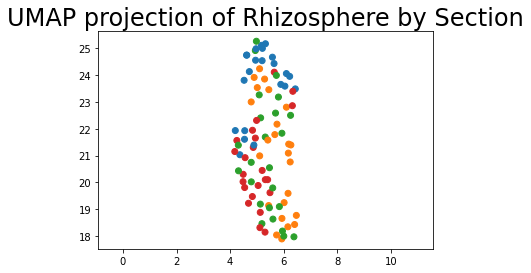

In [26]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in labels['Section'].map({'Nodule':0, 'Top':1, 'Middle':2, 'Bottom':3 })])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of Rhizosphere by Section', fontsize=24)

You can kind of see that the nodule section (blue) is grouped near the top. The other three sections are spread out more 

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
clf = RandomForestClassifier(max_depth = 5, random_state = 21)
clf.fit(log_cnts, labels['Section'].values)

RandomForestClassifier(max_depth=5, random_state=21)

In [30]:
clf.score(log_cnts, labels['Section'].values)

0.956989247311828

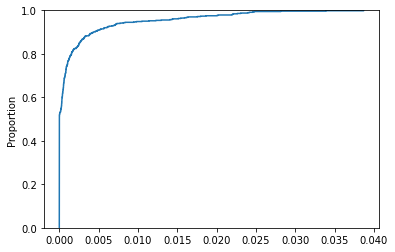

In [31]:
sns.ecdfplot(clf.feature_importances_)

In [32]:
sel_genes = ds['bacteria'].values[clf.feature_importances_>0]

In [38]:
sel_cnts = log_cnts[:,clf.feature_importances_>0]

Text(0.5, 1.0, 'UMAP projection of Rhizosphere by Section')

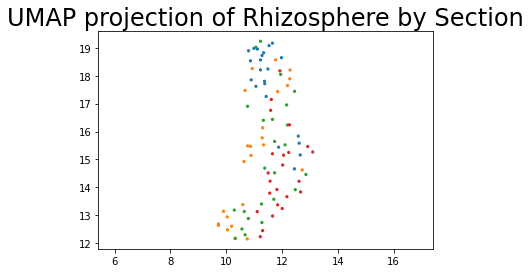

In [39]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(sel_cnts)

plt.scatter(
    embedding[:,0],
    embedding[:,1],
    s=5,
    c =[sns.color_palette()[x] for x in labels['Section'].map({'Nodule':0, 'Top':1, 'Middle':2, 'Bottom':3 })])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of Rhizosphere by Section', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of Rhizosphere by Genotype')

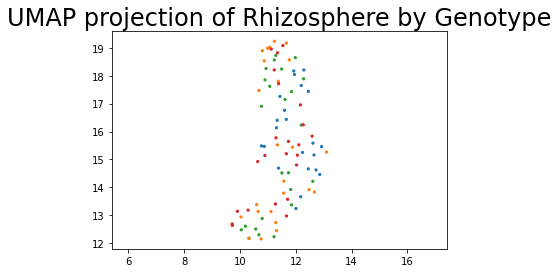

In [40]:
plt.scatter(
    embedding[:,0],
    embedding[:,1],
    s=5,
    c =[sns.color_palette()[x] for x in labels['Genotype'].map({'Desi':0, 'Sierra':1, 'Nash':2, 'Billy Beans':3 })])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of Rhizosphere by Genotype', fontsize=24)